<a href="https://colab.research.google.com/github/jkcg-learning/Recognize_Animals/blob/master/Recognize_Animals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dphi**

**Deep Learning Bootcamp - Assignment 2 - Intermediate: Recognize Animals**

**Submitted by :** ***Jyothish Kumar C G***

Image recognition is a vital component in robotics such as driverless vehicles or domestic robots. Image recognition is also important in image search engines such as Google or Bing image search whereby you use rich image content to query for similar stuff. Like in Google photos where the system uses image recognition to categorize your images into things like cats, dogs, people and so on so that you can quickly search your albums for things like, “give me photos of my cat”, that's awesome.



Ever noticed how Facebook instantly recognises your friend’s face and asks you if you want to tag him in that photo? That’s image recognition. That’s just a basic example.

**Objective**

You are working on a robotics project where you are required to train your robot so that it can differentiate between 5 animals or birds. Your task here is to build a deep learning model that helps you recognize the animal or bird in images.


**About the Data**

The training dataset consists of about 9k medium quality animal images belonging to 5 categories: butterfly, sheep, cow, squirrel, elephant. - mucca (cow), pecora (sheep), elefante (elephant), farfalla (butterfly) and scoiattolo (squirrel). All the images have been collected from "google images" and have been checked by human. There is some erroneous data to simulate real conditions (eg. images taken by users of your app).

***Dataset Link:***https://drive.google.com/file/d/176E-pLhoxTgWsJ3MeoJQV_GXczIA6g8D/view?usp=sharing

From the above link you will be able to download a zip file named ‘animal_dataset_intermediate.zip’. After you extract this zip file, you will get three files:

**train** - contains five folders each folder containing images around 1000 to 2000 of those 5 five animals.  Each image has a unique name.

**test** - contains 910 random images of those 5 animals whose predictions you are to submit on DPhi platform.

**Testing_set_animals.csv** - this is the order of the predictions for each image that is to be submitted on the platform. Make sure the predictions you download are with their image’s filename in the same order as given in this file.
 

**Evaluation Criteria**

Submissions are evaluated using Accuracy Score.

 

 

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD,Adam
%load_ext tensorboard

# Helper libraries
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime

print(tf.__version__)

2.3.0


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='176E-pLhoxTgWsJ3MeoJQV_GXczIA6g8D', 
                                    dest_path='./data/animal_dataset_intermediate.zip', unzip=True)

In [ ]:
import os
DATA_PATH = './data/animal_dataset_intermediate/train/'
print('Cleaning Folder Names')
for i in os.listdir(DATA_PATH):
  os.renames(DATA_PATH+i,DATA_PATH+i.split('_')[0])

Cleaning Folder Names


In [ ]:
#importing necessary libraries
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
class_names = ['elefante','farfalla','mucca','pecora','scoiattolo']
IMG_SIZE = 256

In [ ]:
import pandas as pd
test_data = pd.read_csv('./data/animal_dataset_intermediate/Testing_set_animals.csv')
test_data

,filename,target
0,e030b20928e90021d85a5854ee454296eb70e3c818b413...,NaN
1,e030b20929e90021d85a5854ee454296eb70e3c818b413...,NaN
2,e030b2092be90021d85a5854ee454296eb70e3c818b413...,NaN
3,e030b2092ce90021d85a5854ee454296eb70e3c818b413...,NaN
4,e030b2092de90021d85a5854ee454296eb70e3c818b413...,NaN
...,...,...
905,OIP-5ual0F5ZPZRdkGcj8uSH0AHaFj.jpeg,NaN
906,OIP-5VwIBS0B8SxZbUiAHBJg7gHaE8.jpeg,NaN
907,OIP-5WG0rHWAZYtu0utoZfuaAgHaFj.jpeg,NaN
908,OIP-5ZwfeYunG6CT2wEI7OjybQHaEo.jpeg,NaN


In [ ]:
test_data['target'] = "./data/animal_dataset_intermediate/test/" + test_data['filename']
test_data


,filename,target
0,e030b20928e90021d85a5854ee454296eb70e3c818b413...,./data/animal_dataset_intermediate/test/e030b2...
1,e030b20929e90021d85a5854ee454296eb70e3c818b413...,./data/animal_dataset_intermediate/test/e030b2...
2,e030b2092be90021d85a5854ee454296eb70e3c818b413...,./data/animal_dataset_intermediate/test/e030b2...
3,e030b2092ce90021d85a5854ee454296eb70e3c818b413...,./data/animal_dataset_intermediate/test/e030b2...
4,e030b2092de90021d85a5854ee454296eb70e3c818b413...,./data/animal_dataset_intermediate/test/e030b2...
...,...,...
905,OIP-5ual0F5ZPZRdkGcj8uSH0AHaFj.jpeg,./data/animal_dataset_intermediate/test/OIP-5u...
906,OIP-5VwIBS0B8SxZbUiAHBJg7gHaE8.jpeg,./data/animal_dataset_intermediate/test/OIP-5V...
907,OIP-5WG0rHWAZYtu0utoZfuaAgHaFj.jpeg,./data/animal_dataset_intermediate/test/OIP-5W...
908,OIP-5ZwfeYunG6CT2wEI7OjybQHaEo.jpeg,./data/animal_dataset_intermediate/test/OIP-5Z...


In [ ]:
data_test = []

try:
    #files = glob.glob("./data/animal_dataset_intermediate/test"+"/*") # get files in each folder(class)
    files = test_data['target']
    for f in files:
      img = cv2.imread(f) #read the image
      img = cv2.resize(img,(IMG_SIZE,IMG_SIZE)) #resize the image
      data_test.append([np.array(img)]) #Append images and corresponding labels to data
except:
    pass   
    

In [ ]:
type(data_test)

list

In [ ]:
data_test_tf = tf.convert_to_tensor(data_test, np.float32)
print(type(data_test_tf))
data_test_tf[0]

<class 'tensorflow.python.framework.ops.EagerTensor'>


<tf.Tensor: shape=(1, 256, 256, 3), dtype=float32, numpy=
array([[[[118., 147., 151.],
         [119., 148., 152.],
         [122., 149., 154.],
         ...,
         [ 70., 129., 109.],
         [ 70., 129., 109.],
         [ 69., 128., 108.]],

        [[118., 147., 151.],
         [120., 149., 153.],
         [122., 149., 154.],
         ...,
         [ 71., 129., 109.],
         [ 70., 128., 109.],
         [ 69., 127., 108.]],

        [[118., 147., 151.],
         [119., 148., 152.],
         [121., 148., 153.],
         ...,
         [ 72., 128., 109.],
         [ 72., 128., 109.],
         [ 71., 125., 108.]],

        ...,

        [[ 83., 163., 164.],
         [ 83., 163., 164.],
         [ 82., 162., 163.],
         ...,
         [ 97., 142., 158.],
         [ 95., 142., 156.],
         [ 95., 142., 156.]],

        [[ 81., 161., 162.],
         [ 81., 161., 162.],
         [ 80., 160., 161.],
         ...,
         [ 96., 141., 157.],
         [ 94., 141., 155.],
         

In [ ]:
data_test_tf_reshaped = tf.reshape(data_test_tf,[910,256,256,3])
data_test_tf_reshaped.shape

TensorShape([910, 256, 256, 3])

In [ ]:
data_test_normalized = np.divide(data_test_tf_reshaped, 255.0)
data_test_normalized[0]

array([[[0.4627451 , 0.5764706 , 0.5921569 ],
        [0.46666667, 0.5803922 , 0.59607846],
        [0.47843137, 0.58431375, 0.6039216 ],
        ...,
        [0.27450982, 0.5058824 , 0.42745098],
        [0.27450982, 0.5058824 , 0.42745098],
        [0.27058825, 0.5019608 , 0.42352942]],

       [[0.4627451 , 0.5764706 , 0.5921569 ],
        [0.47058824, 0.58431375, 0.6       ],
        [0.47843137, 0.58431375, 0.6039216 ],
        ...,
        [0.2784314 , 0.5058824 , 0.42745098],
        [0.27450982, 0.5019608 , 0.42745098],
        [0.27058825, 0.49803922, 0.42352942]],

       [[0.4627451 , 0.5764706 , 0.5921569 ],
        [0.46666667, 0.5803922 , 0.59607846],
        [0.4745098 , 0.5803922 , 0.6       ],
        ...,
        [0.28235295, 0.5019608 , 0.42745098],
        [0.28235295, 0.5019608 , 0.42745098],
        [0.2784314 , 0.49019608, 0.42352942]],

       ...,

       [[0.3254902 , 0.6392157 , 0.6431373 ],
        [0.3254902 , 0.6392157 , 0.6431373 ],
        [0.32156864, 0

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255., # rescaling
                                   rotation_range = 40,  # for augmentation
                                   width_shift_range = 0.2,
                                   validation_split = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1.0/255.,validation_split = 0.2)

train_generator = train_datagen.flow_from_directory("./data/animal_dataset_intermediate/train",
                                                    batch_size = 32,
                                                    subset="training",
                                                    class_mode = 'categorical', 
                                                    target_size = (256, 256))

val_generator = val_datagen.flow_from_directory("./data/animal_dataset_intermediate/train",
                                                    batch_size = 32,
                                                    subset = "validation",
                                                    class_mode = 'categorical', 
                                                    target_size = (256, 256))


Found 6558 images belonging to 5 classes.
Found 1638 images belonging to 5 classes.


In [ ]:
lrr= ReduceLROnPlateau(
                       monitor='val_loss', #Metric to be measured
                       factor=.01, #Factor by which learning rate will be reduced
                       patience=3,  #No. of epochs after which if there is no improvement in the val_loss, the learning rate is reduced
                       min_lr=1e-5) #The minimum learning rate 

In [ ]:
learn_rate=.001

sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [ ]:
# plotting helper function
def plotaccuracy(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [ ]:
# plotting helper function
def plotloss(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [ ]:
INPUT_SHAPE = (256, 256, 3)

# define sequential model
model = tf.keras.models.Sequential()

# Add the vgg convolutional base model
#model.add(vgg_layers)

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(4, 4), strides=(1, 1), 
                                activation='relu', padding='same', input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# define conv-pool layers - set 2
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), 
                                activation='relu', padding='same', input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# add flatten layer
model.add(tf.keras.layers.Flatten())


# add dense layers with some dropout
model.add(tf.keras.layers.Dense(512, activation='relu',kernel_regularizer = 'l2'))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(256, activation='relu',kernel_regularizer = 'l2'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(128, activation='relu'))

#model.add(tf.keras.layers.Flatten())


# add output layer
model.add(tf.keras.layers.Dense(5, activation='softmax'))

# compile model
model.compile(optimizer=adam, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# view model layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 16)      4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               33554944  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0

In [ ]:
EPOCHS = 100

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, 
                                               restore_best_weights=True,
                                               verbose=2)

history = model.fit(train_generator,
                    validation_data = val_generator,
                    batch_size=16,
                    callbacks=[es_callback], 
                    epochs=EPOCHS,
                    verbose=1)

Epoch 1/100
205/205 [==============================] - 95s 462ms/step - loss: 5.5278 - accuracy: 0.2652 - val_loss: 3.0411 - val_accuracy: 0.2106
Epoch 2/100
205/205 [==============================] - 95s 462ms/step - loss: 2.6984 - accuracy: 0.3371 - val_loss: 2.5105 - val_accuracy: 0.3327
Epoch 3/100
205/205 [==============================] - 95s 462ms/step - loss: 2.1341 - accuracy: 0.4047 - val_loss: 2.0956 - val_accuracy: 0.3272
Epoch 4/100
205/205 [==============================] - 95s 462ms/step - loss: 1.8799 - accuracy: 0.4303 - val_loss: 1.9117 - val_accuracy: 0.4615
Epoch 5/100
205/205 [==============================] - 95s 461ms/step - loss: 1.7838 - accuracy: 0.4469 - val_loss: 1.7177 - val_accuracy: 0.4670
Epoch 6/100
205/205 [==============================] - 94s 460ms/step - loss: 1.6441 - accuracy: 0.4469 - val_loss: 1.5332 - val_accuracy: 0.4890
Epoch 7/100
205/205 [==============================] - 94s 460ms/step - loss: 1.6656 - accuracy: 0.4610 - val_loss: 1.5575 -

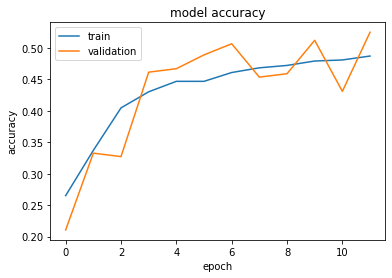

In [ ]:
plotaccuracy(history)

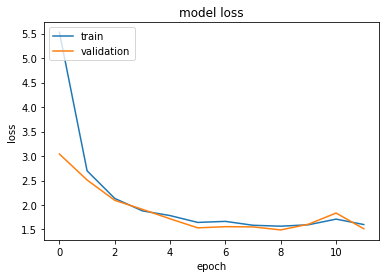

In [ ]:
plotloss(history)

In [ ]:
preds = model.predict(data_test_normalized)
#if using softmax activation on output layer
predicted_labels  = np.argmax(preds,axis=1)


In [ ]:
predicted_labels

array([1, 1, 2, 2, 1, 1, 4, 1, 1, 1, 2, 2, 1, 4, 1, 1, 0, 1, 1, 1, 3, 1,
       2, 4, 1, 3, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 4, 4, 0, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 4, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       4, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 2, 1, 4, 1, 1,
       1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1,
       2, 1, 1, 1, 1, 4, 1, 4, 1, 4, 2, 1, 1, 1, 1, 2, 1, 2, 1, 4, 2, 4,
       1, 1, 4, 2, 1, 2, 1, 1, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,

In [ ]:
#Accessing classnames with predicted clases
final_predictions = [class_names[i] for i in predicted_labels]
final_predictions

['farfalla',
 'farfalla',
 'mucca',
 'mucca',
 'farfalla',
 'farfalla',
 'scoiattolo',
 'farfalla',
 'farfalla',
 'farfalla',
 'mucca',
 'mucca',
 'farfalla',
 'scoiattolo',
 'farfalla',
 'farfalla',
 'elefante',
 'farfalla',
 'farfalla',
 'farfalla',
 'pecora',
 'farfalla',
 'mucca',
 'scoiattolo',
 'farfalla',
 'pecora',
 'mucca',
 'farfalla',
 'farfalla',
 'farfalla',
 'farfalla',
 'farfalla',
 'mucca',
 'farfalla',
 'farfalla',
 'farfalla',
 'farfalla',
 'farfalla',
 'farfalla',
 'farfalla',
 'farfalla',
 'farfalla',
 'farfalla',
 'mucca',
 'farfalla',
 'farfalla',
 'scoiattolo',
 'scoiattolo',
 'elefante',
 'mucca',
 'mucca',
 'farfalla',
 'farfalla',
 'farfalla',
 'mucca',
 'farfalla',
 'farfalla',
 'farfalla',
 'farfalla',
 'farfalla',
 'farfalla',
 'farfalla',
 'farfalla',
 'farfalla',
 'scoiattolo',
 'farfalla',
 'mucca',
 'farfalla',
 'farfalla',
 'farfalla',
 'farfalla',
 'mucca',
 'farfalla',
 'farfalla',
 'farfalla',
 'farfalla',
 'farfalla',
 'farfalla',
 'farfalla',
 'fa

In [ ]:
# define input shape
INPUT_SHAPE_VGG = (256, 256, 3)

# get the VGG19 model
vgg_layers = tf.keras.applications.vgg19.VGG19(weights='imagenet', include_top=False, 
                                               input_shape=INPUT_SHAPE_VGG)

vgg_layers.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [ ]:
# Fine-tune all the layers
for layer in vgg_layers.layers:
    layer.trainable = True

# Check the trainable status of the individual layers
for layer in vgg_layers.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fbf620e7e48> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fbf62190780> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fbf6208e390> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fbf620dd5f8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fbf620dddd8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fbf620eac50> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fbf620eafd0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fbf620eac88> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fbf62072860> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fbf62077390> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fbf62077a58> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fbf62099

In [ ]:
# define sequential model
model_vgg = tf.keras.models.Sequential()

# Add the vgg convolutional base model
model_vgg.add(vgg_layers)

# add flatten layer
model_vgg.add(tf.keras.layers.Flatten())


model_vgg.add(tf.keras.layers.Dense(512, activation='relu',input_dim=512,kernel_regularizer = 'l2'))
model_vgg.add(Dropout(.3))
model.add(tf.keras.layers.BatchNormalization())
model_vgg.add(Dense(256,activation=('relu'),kernel_regularizer = 'l1'))
model_vgg.add(Dropout(.2))

# add output layer
model_vgg.add(tf.keras.layers.Dense(5, activation='softmax'))

# compile model
model_vgg.compile(optimizer=sgd, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# view model layers
model_vgg.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 8, 8, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               16777728  
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                

In [ ]:
EPOCHS_VGG = 100

es_callback_VGG = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, 
                                               restore_best_weights=True,
                                               verbose=2)

history_VGG = model_vgg.fit(train_generator,
                    validation_data = val_generator,
                    batch_size=32,
                    callbacks=[es_callback_VGG], 
                    epochs=EPOCHS_VGG,
                    verbose=1)

Epoch 1/100
205/205 [==============================] - 121s 589ms/step - loss: 57.0877 - accuracy: 0.6205 - val_loss: 44.7180 - val_accuracy: 0.8468
Epoch 2/100
205/205 [==============================] - 119s 581ms/step - loss: 34.9891 - accuracy: 0.8693 - val_loss: 26.0945 - val_accuracy: 0.9237
Epoch 3/100
205/205 [==============================] - 119s 581ms/step - loss: 19.5867 - accuracy: 0.9038 - val_loss: 13.9120 - val_accuracy: 0.9402
Epoch 4/100
205/205 [==============================] - 119s 582ms/step - loss: 10.5806 - accuracy: 0.9187 - val_loss: 8.2510 - val_accuracy: 0.9170
Epoch 5/100
205/205 [==============================] - 119s 579ms/step - loss: 7.6238 - accuracy: 0.9189 - val_loss: 7.2328 - val_accuracy: 0.9298
Epoch 6/100
205/205 [==============================] - 119s 580ms/step - loss: 6.9580 - accuracy: 0.9175 - val_loss: 6.6425 - val_accuracy: 0.9353
Epoch 7/100
205/205 [==============================] - 119s 579ms/step - loss: 6.3708 - accuracy: 0.9323 - val_

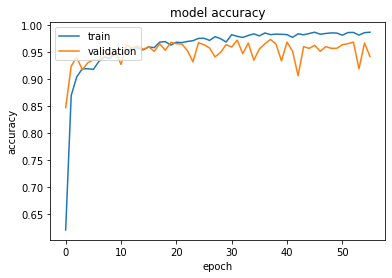

In [ ]:
plotaccuracy(history_VGG)

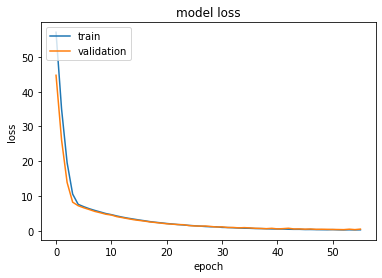

In [ ]:
plotloss(history_VGG)

In [ ]:
preds_VGG = model_vgg.predict(data_test_normalized)
#if using softmax activation on output layer
predicted_labels_VGG  = np.argmax(preds_VGG,axis=1)


In [ ]:
predicted_labels_VGG

array([1, 1, 1, 1, 1, 1, 0, 3, 3, 3, 3, 0, 0, 0, 3, 1, 0, 0, 3, 1, 0, 0,
       3, 3, 3, 3, 0, 1, 1, 1, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 1, 3, 1, 3,
       3, 0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 1, 1, 0, 1, 3, 3, 1, 1, 1, 3, 1,
       3, 1, 1, 3, 1, 1, 3, 3, 3, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 3, 0,
       0, 0, 1, 3, 0, 0, 0, 3, 1, 0, 3, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 1, 0, 3, 3, 0, 0, 3, 1, 1, 3, 0, 0, 0, 0, 0, 0, 1, 4, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 1, 1, 0, 0, 0, 3, 1, 1,
       0, 3, 1, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 1, 3, 1, 0, 0, 3, 1, 0, 1,
       3, 1, 1, 3, 1, 3, 1, 3, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 3, 3, 0, 3,
       3, 3, 0, 0, 3, 0, 4, 0, 1, 1, 1, 0, 1, 1, 1, 3, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 3, 1, 1, 0, 0, 3, 3, 0, 0, 0, 3, 0, 1, 1, 3, 0, 1, 1, 1,
       0, 0, 0, 3, 1, 1, 1, 1, 1, 1, 0, 1, 0, 3, 1, 1, 2, 1, 3, 0, 3, 4,
       3, 3, 1, 1, 0, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 0, 1, 3,
       3, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0,

In [ ]:
#Accessing classnames with predicted clases
final_predictions_VGG = [class_names[i] for i in predicted_labels_VGG]
final_predictions_VGG

['farfalla',
 'farfalla',
 'farfalla',
 'farfalla',
 'farfalla',
 'farfalla',
 'elefante',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'elefante',
 'elefante',
 'elefante',
 'pecora',
 'farfalla',
 'elefante',
 'elefante',
 'pecora',
 'farfalla',
 'elefante',
 'elefante',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'elefante',
 'farfalla',
 'farfalla',
 'farfalla',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'elefante',
 'pecora',
 'pecora',
 'pecora',
 'farfalla',
 'farfalla',
 'pecora',
 'farfalla',
 'pecora',
 'pecora',
 'elefante',
 'elefante',
 'elefante',
 'elefante',
 'elefante',
 'elefante',
 'farfalla',
 'farfalla',
 'farfalla',
 'pecora',
 'farfalla',
 'farfalla',
 'elefante',
 'farfalla',
 'pecora',
 'pecora',
 'farfalla',
 'farfalla',
 'farfalla',
 'pecora',
 'farfalla',
 'pecora',
 'farfalla',
 'farfalla',
 'pecora',
 'farfalla',
 'farfalla',
 'pecora',
 'pecora',
 'pecora',
 'farfalla',
 'elefante',
 'elefante',
 'farfalla',
 'farfalla',
 'farfalla',
 'farfa